In [1]:
from experiment import Experiment
from utils.behavior_data import BehaviorData
from utils.content import StatesHandler
from visuals import Plotter
import torch
import numpy as np
from utils.state_data import StateData
import matplotlib.pyplot as plt

In [2]:
ageMatching = [0, 1, 2, 3]
# ageMatching = [2, 3]
# ageMatching = [0, 1]
respondPerc = .25


def plot_state_elem_running_change(data, title="State Elem Running Change"):
    L = len(data)
    fig, ax = plt.subplots(nrows=5, figsize=(5,12))
    x = np.arange(selems[0]['start'].shape[0])
    for i in range(len(data[0])):
        diff = data[:, i]
        diff = np.sort(diff)[::-1]
        C = np.array(["r"] * diff.shape[0])
        imp = diff > 0
        dec = diff < 0
        imp_perc = imp.sum() / imp.shape[0]
        dec_perc = dec.sum() / dec.shape[0]
        C[imp] = "r"
        C[dec] = "b"
        imp_stop = np.where(imp==True)[0][-1]
        dec_start = np.where(dec==True)[0][0]
        ax[i].axvline(imp_stop+.4, alpha=0.8, ymin=0.5, linestyle="--", color="r", label="Improvement Stops")
        ax[i].axvline(dec_start-.4, alpha=0.8, ymax=0.5, linestyle="--", color="b", label="Deterioration Starts")
        ax[i].text(int(imp.sum()*.85), -.7, f"{imp_perc*100:.1f}%")
        ax[i].text((~dec).sum(), .5, f"{dec_perc*100:.1f}%")
        ax[i].bar(x, diff, color=C)
        ax[i].set_ylim((-2,2))
        elem_label(ax, i)
        ax[i].axhline(0, alpha=0.8, linestyle="--", color="k")
        if i < (L-1):
            ax[i].get_xaxis().set_visible(False)
        if i == 0:
            ax[i].legend(loc="lower left")
        if i == (L-1):
            ax[i].set_xlabel("Participant ID")
        ticks(ax[i])
        
    sub_adj()
    ax[0].set_title(title, fontsize=14)


def load_questionnaire_states(endline=False, detail=0, aiset=True):
        if (detail > 1):
            sh = StatesHandler(map="map_individual.json", endline=endline)
        elif (detail > 0):
            sh = StatesHandler(map="map_detailed.json", endline=endline)
        else:
            sh = StatesHandler(map="map.json", endline=endline)
        whatsapps, states = sh.compute_states()
        def modify_whatsapp(x):
            # helper function to parse the whatsapp numbers
            x = str(x)
            x = x[len(x)-10:]
            return int(x)
        participantIDs = torch.tensor(np.loadtxt("arogya_content/all_ai_participants.csv", delimiter=",", skiprows=1, dtype="int64"))
        participantIDs[:, 1].apply_(modify_whatsapp)
        
        # filter responses to only include ones in the AI participant set
        isect, idIdxs, stateIdxs = np.intersect1d(participantIDs[:, 1], whatsapps, return_indices=True)
        if (aiset):
            # combine the glific IDs with the states into a dictionary and return
            return dict(zip(participantIDs[idIdxs, 0].numpy(), states[stateIdxs].numpy()))
        else:
            if (True):
                stats = np.delete(states.numpy(), stateIdxs, axis=0)
                wapps = np.delete(whatsapps.numpy(), stateIdxs)
            else:
                stats = states.numpy()
                wapps = whatsapps.numpy()
            return dict(zip(wapps, stats))
        
post = load_questionnaire_states(True, 2, True)
print(len(post))
pre = load_questionnaire_states(False, 2, True)
print(len(pre))


diffs = []
demos = []

bd = BehaviorData(minw=2, maxw=29, include_state=True, include_pid=False, top_respond_perc=respondPerc)

for glifid in post.keys():
    if glifid in pre and glifid in bd.data['pid'].to_numpy():
        diffs.append(post[glifid] - pre[glifid])
        demos.append(pre[glifid][-3:])
    else:
        None
        #print(glifid)
    
print(len(diffs))

demos = np.array(demos)
allDiffValsAI = np.array(diffs)[:, 0:-3]


480
806
402 537
(3470, 38) (3470, 8)
122


In [3]:
ages, counts = np.unique(demos[:, 0], return_counts=True)
print("Age brackets (18-25, 26-35, 36-50, 51+): ", counts)
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4));
# ax.boxplot(demos[:, 0], meanline=True, showmeans=True);
# ax.set(title="Age")
ageMatch = np.isin(demos[:, 0], ageMatching)
diffValsAI = allDiffValsAI[ageMatch]

Age brackets (18-25, 26-35, 36-50, 51+):  [57 65]


In [4]:
post = load_questionnaire_states(True, 2, False)
print(len(post))
pre = load_questionnaire_states(False, 2, False)
print(len(pre))


diffs = []
demos = []

for glifid in post.keys():
    if glifid in pre:
        diffs.append(post[glifid] - pre[glifid])
        demos.append(pre[glifid][-3:])
    else:
        None
        
allDiffValsNAI = np.array(diffs)[:, 0:-3]
demos = np.array(demos)
print(len(diffs))

568
807
441


In [5]:
ages, counts = np.unique(demos[:, 0], return_counts=True)
print("Age brackets (18-25, 26-35, 36-50, 51+): ", counts)
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4));
# ax.boxplot(demos[:, 0], meanline=True, showmeans=True);
# ax.set(title="Age")
ageMatch = np.isin(demos[:, 0], ageMatching)
diffValsNAI = allDiffValsNAI[ageMatch]

Age brackets (18-25, 26-35, 36-50, 51+):  [165 276]


Component                     	Baseline Mean  	AI Mean   
_____________________________________________________________________________________________
3_1                           :	0.29025,	0.47541
3_3                           :	0.19501,	0.31148
3_4                           :	0.34921,	0.34426
3_5                           :	0.26757,	0.52459
4                             :	0.24490,	-0.07377
5_1                           :	0.12245,	-0.21311
5_2                           :	0.03175,	-0.08197
5_3                           :	-0.00907,	0.06557
5_4                           :	0.02268,	0.00000
5_5                           :	0.22676,	0.42623
5_6                           :	0.10431,	0.19672
5_7                           :	0.04989,	-0.03279
6                             :	0.03628,	-0.11475
7                             :	-0.06576,	-0.01639
8                             :	0.01361,	-0.04918
9                             :	0.06122,	0.08197
10                            :	-0.19728,	-0.14754
11  

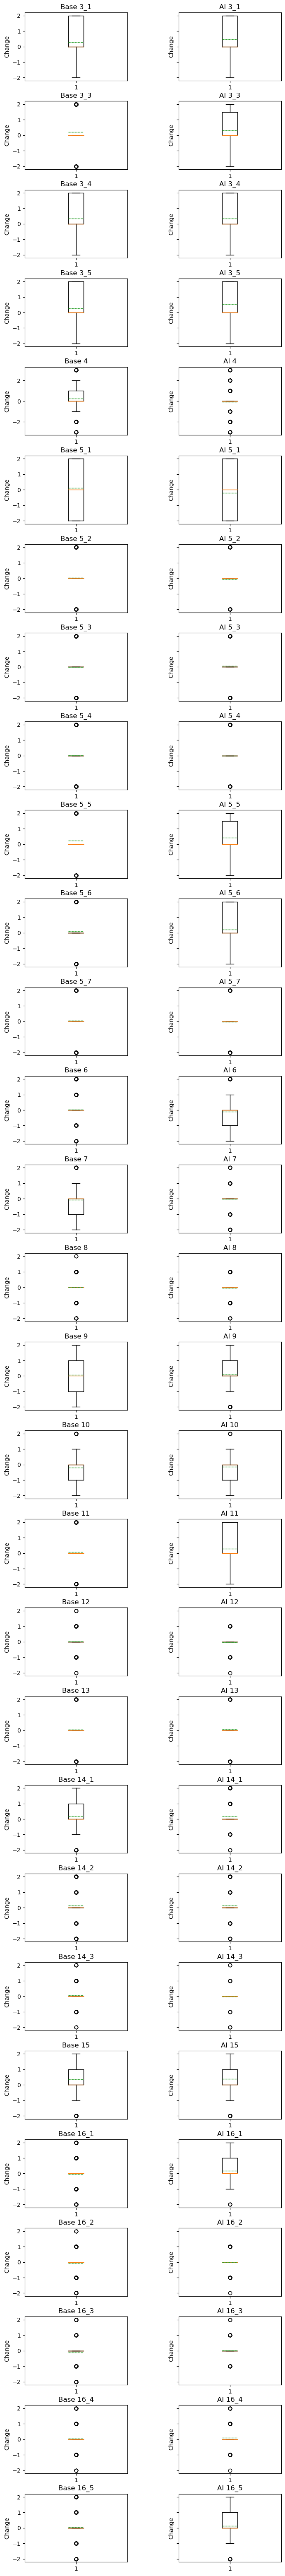

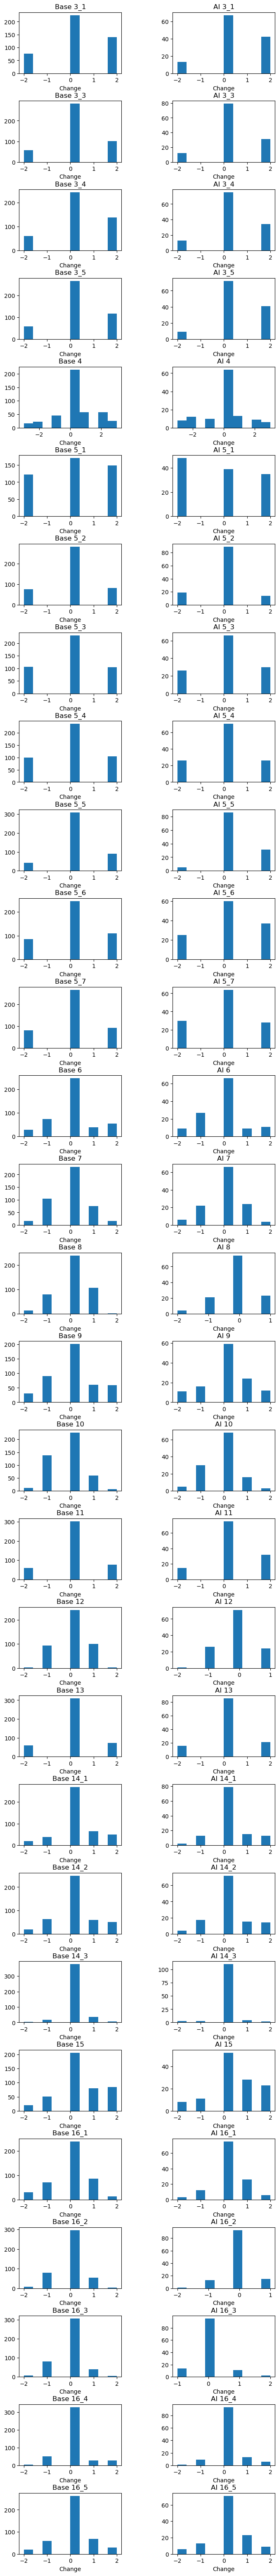

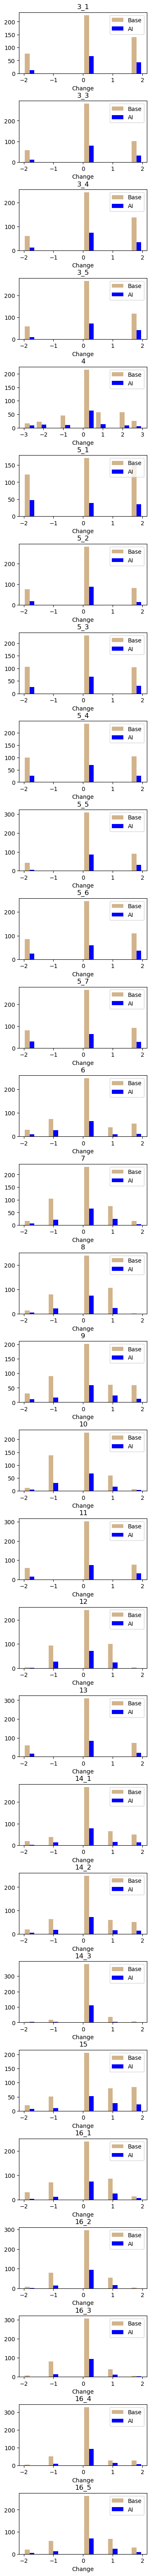

In [6]:

diffMeansAI = diffValsAI.mean(axis=0)
diffMeansNAI = diffValsNAI.mean(axis=0)

elem_map = ["3_1",
        "3_3",
        "3_4",
        "3_5",
        "4",
        "5_1",
        "5_2",
        "5_3",
        "5_4",
        "5_5",
        "5_6",
        "5_7",
        "6",
        "7",
        "8",
        "9",
        "10",
        "11",
        "12",
        "13",
        "14_1",
        "14_2",
        "14_3",
        "15",
        "16_1",
        "16_2",
        "16_3",
        "16_4",
        "16_5"]

maxLen = max(elem_map, key=len)
numFigs = len(elem_map)

print(f'{"Component":30}\t{"Baseline Mean":15}\t{"AI Mean":10}')

print("_____________________________________________________________________________________________")

for x in range(numFigs):
    print(f'{elem_map[x]:30}:\t{diffMeansNAI[x]:.5f},\t{diffMeansAI[x]:.5f}')

fig, ax = plt.subplots(nrows=numFigs, ncols=2, sharey="row", figsize=(8, 80));
for x in range(numFigs):
    ax[x, 0].boxplot(diffValsNAI[:, x], meanline=True, showmeans=True);
    ax[x, 0].set(title="Base " + elem_map[x], ylabel="Change")
    ax[x, 1].boxplot(diffValsAI[:, x], meanline=True, showmeans=True);
    ax[x, 1].set(title="AI " + elem_map[x], ylabel="Change")
plt.subplots_adjust(hspace=.30, wspace=.5)

fig, ax = plt.subplots(nrows=numFigs, ncols=2, figsize=(8, 80));
for x in range(numFigs):
    ax[x, 0].hist(diffValsNAI[:, x]);
    ax[x, 0].set(title="Base " + elem_map[x], xlabel="Change")
    ax[x, 1].hist(diffValsAI[:, x]);
    ax[x, 1].set(title="AI " + elem_map[x], xlabel="Change")
plt.subplots_adjust(hspace=.45, wspace=.5)


fig, ax = plt.subplots(nrows=numFigs, ncols=1, figsize=(4, 80));
for x in range(numFigs):
    ax[x].hist([diffValsNAI[:, x], diffValsAI[:, x]], color=['tan', 'blue'], label=['Base', 'AI'], stacked=False);
    ax[x].set(title=elem_map[x], xlabel="Change")
    ax[x].legend()
plt.subplots_adjust(hspace=.45, wspace=.25)